<a href="https://colab.research.google.com/github/Mael-Kelvin/Trabalho-Extensionista---Python/blob/main/Trabalho_Extensionista_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Link do dataset
#https://www.kaggle.com/datasets/stefanydeoliveira/summer-olympics-medals-1896-2024

# Importação do dataset
import kagglehub

# Download latest version
path = kagglehub.dataset_download("stefanydeoliveira/summer-olympics-medals-1896-2024")

print("Path to dataset files:", path)

100%|██████████| 3.75M/3.75M [00:00<00:00, 92.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/stefanydeoliveira/summer-olympics-medals-1896-2024/versions/1


(None,)

In [ ]:
# Importação das bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [ ]:
# Fazendo o upload dos dados diretamente no Colab.
from google.colab import files
uploaded = files.upload()

Saving continents.csv to continents.csv
Saving olympics_dataset.csv to olympics_dataset.csv


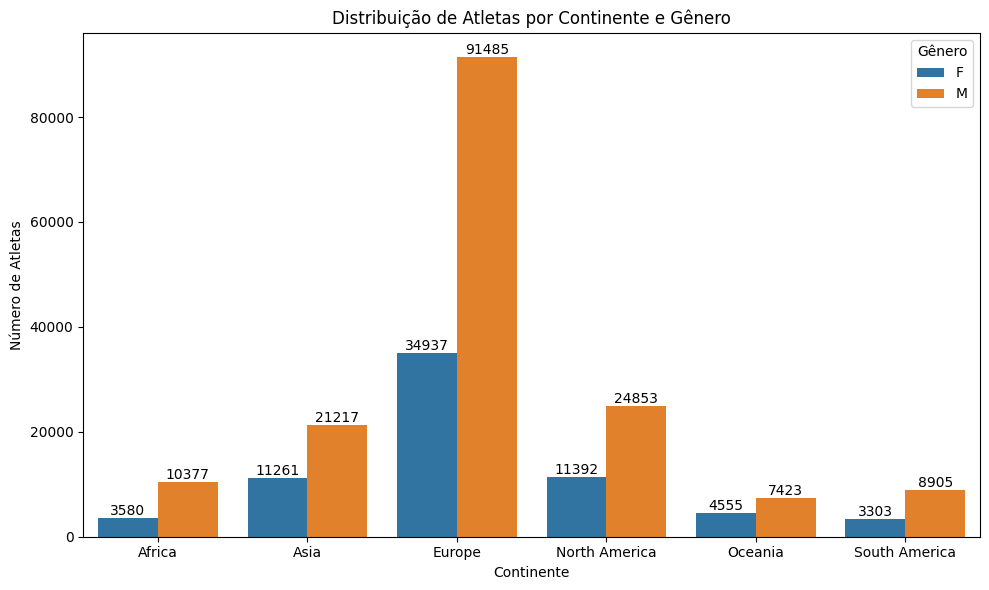

In [ ]:
# Carregar o dataset principal
df = pd.read_csv('olympics_dataset.csv')

# Carregar a tabela de continentes
continents_df = pd.read_csv('continents.csv')

# Fazer o merge para adicionar o continente ao dataset
df = pd.merge(df, continents_df, on='NOC', how='left')

# Contar a quantidade de atletas por Continente e Sexo
continent_gender_distribution = df.groupby(['Continent', 'Sex']).size().reset_index(name='Count')

# Configurar o gráfico
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=continent_gender_distribution, x='Continent', y='Count', hue='Sex')

# Adicionar rótulos com os valores exatos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')  # %d para valores inteiros

plt.title('Distribuição de Atletas por Continente e Gênero')
plt.xlabel('Continente')
plt.ylabel('Número de Atletas')
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()

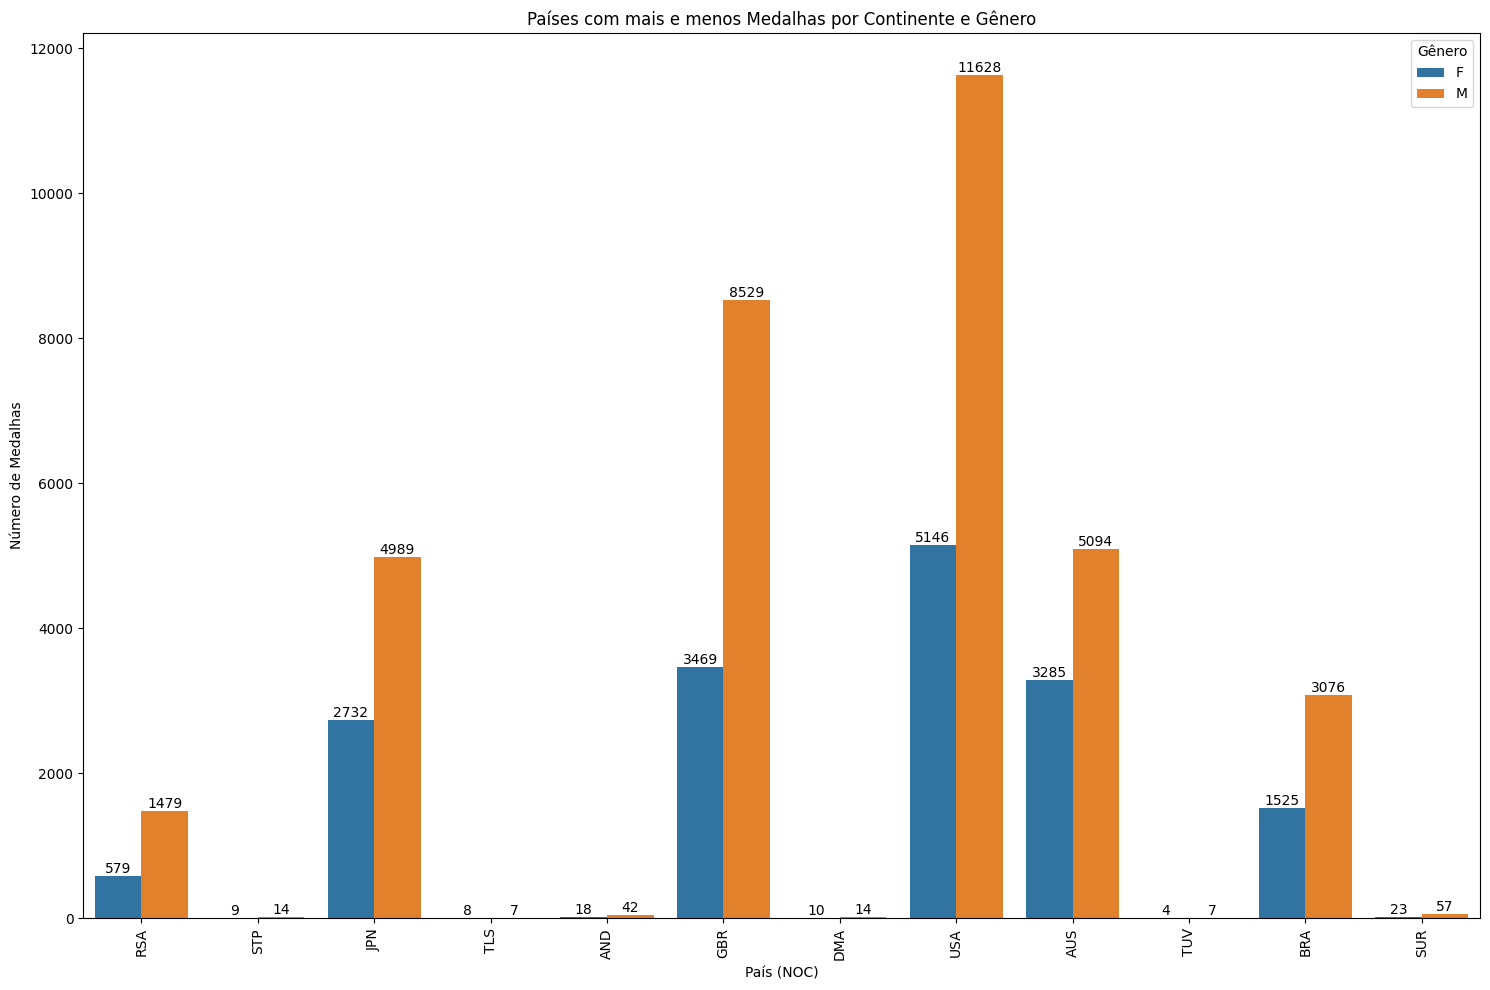

In [ ]:
df = pd.read_csv('olympics_dataset.csv')

# Carregar a tabela de continentes
continents_df = pd.read_csv('continents.csv')

# Fazer o merge para adicionar o continente ao dataset
df = pd.merge(df, continents_df, on='NOC', how='left')

# Filtrar apenas para os atletas que ganharam medalhas
medals_df = df[df['Medal'].notna()]

# Contar o número total de medalhas por país e continente
medal_counts = medals_df.groupby(['Continent', 'NOC']).size().reset_index(name='Total_Medals')

# Criar um dataframe para armazenar os top 5 e bottom 5 de cada continente
top_bottom_countries = pd.DataFrame()

# Loop para encontrar os top 5 e bottom 5 de cada continente
for continent in medal_counts['Continent'].unique():
    continent_data = medal_counts[medal_counts['Continent'] == continent]
    top_5 = continent_data.nlargest(1, 'Total_Medals')
    bottom_5 = continent_data.nsmallest(1, 'Total_Medals')
    top_bottom_countries = pd.concat([top_bottom_countries, top_5, bottom_5])

# Filtrar o dataset original para incluir apenas os 50 países selecionados
filtered_df = medals_df[medals_df['NOC'].isin(top_bottom_countries['NOC'])]

# Contar medalhas por NOC, Continente e Sexo
continent_gender_medals = filtered_df.groupby(['Continent', 'NOC', 'Sex']).size().reset_index(name='Medal_Count')

# Configurar o gráfico
plt.figure(figsize=(15, 10))
ax = sns.barplot(data=continent_gender_medals, x='NOC', y='Medal_Count', hue='Sex', dodge=True)
plt.xticks(rotation=90)  # Rotaciona os rótulos dos países para facilitar a leitura

# Adicionar rótulos com os valores exatos nas barras
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')

plt.title('Países com mais e menos Medalhas por Continente e Gênero')
plt.xlabel('País (NOC)')
plt.ylabel('Número de Medalhas')
plt.legend(title='Gênero')
plt.tight_layout()
plt.show()

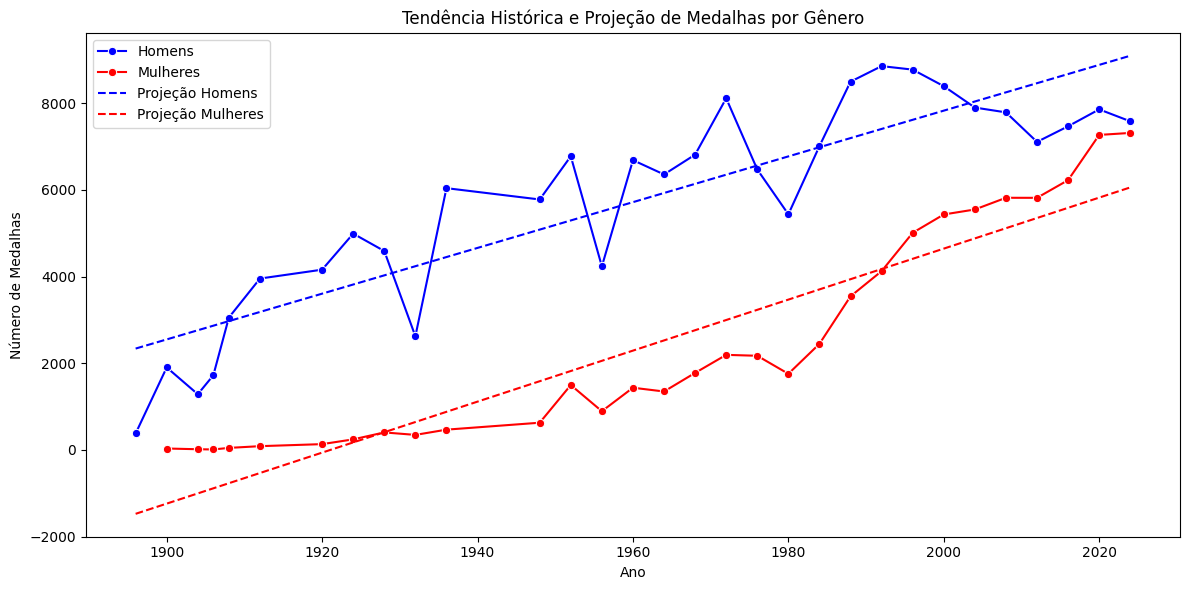

In [ ]:
# Filtrar apenas para atletas que ganharam medalhas
medals_df = df[df['Medal'].notna()]

# Contar o número de medalhas por ano e sexo
medals_by_year_gender = medals_df.groupby(['Year', 'Sex']).size().reset_index(name='Medal_Count')

# Separar os dados por gênero
male_data = medals_by_year_gender[medals_by_year_gender['Sex'] == 'M']
female_data = medals_by_year_gender[medals_by_year_gender['Sex'] == 'F']

# Criar um gráfico de linha para observar a tendência histórica
plt.figure(figsize=(12, 6))
sns.lineplot(data=male_data, x='Year', y='Medal_Count', label='Homens', marker='o', color='blue')
sns.lineplot(data=female_data, x='Year', y='Medal_Count', label='Mulheres', marker='o', color='red')

# Projeção de tendência futura
# Preparar dados para regressão linear
years = medals_by_year_gender['Year'].unique().reshape(-1, 1)

# Regressão para homens
male_model = LinearRegression()
male_model.fit(male_data['Year'].values.reshape(-1, 1), male_data['Medal_Count'])
male_projection = male_model.predict(years)

# Regressão para mulheres
female_model = LinearRegression()
female_model.fit(female_data['Year'].values.reshape(-1, 1), female_data['Medal_Count'])
female_projection = female_model.predict(years)

# Plotar projeções
plt.plot(years, male_projection, linestyle='--', color='blue', label='Projeção Homens')
plt.plot(years, female_projection, linestyle='--', color='red', label='Projeção Mulheres')

# Adicionar títulos e legendas
plt.title('Tendência Histórica e Projeção de Medalhas por Gênero')
plt.xlabel('Ano')
plt.ylabel('Número de Medalhas')
plt.legend()
plt.tight_layout()
plt.show()